# Gradient Descent Method

## References
* [How to implement a gradient descent in Python to find a local minimum ?](https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/)

## Preparations

In [7]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

## Example 1

Given the following function (let us name the function as 'loss function $L(w)$'): 
$$ L (w ) = \frac{1}{2} (w-4)^2 $$

Fine $w$ where $L$ is minimized!

### Plot the loss function

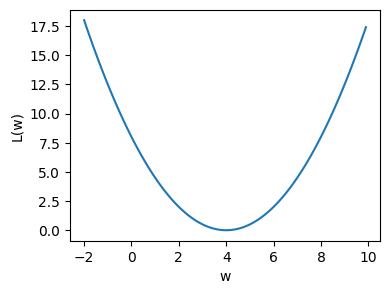

In [8]:
w = np.arange(-2, 10, 0.1)
L = 0.5 * (w - 4)**2

plt.figure(figsize = (4,3))
plt.plot(w, L)
plt.xlabel("w")
plt.ylabel("L(w)")
plt.show()

### Loss and loss gradient

Loss function:

$$ L (w ) = \frac{1}{2} (w-4)^2 $$

Derivative of the loss function:

$$ \frac{dL(w)}{dw} = (w-4) $$



In [9]:
def loss_fn(w):
    # Calculating the loss or cost
    # Returns the loss and the loss gradient
    loss = 0.5 * (w - 4)**2
    loss_grad = (w-4)

    return loss, loss_grad

### The gradient descent method

In [10]:
iterations = 10
learning_rate = 0.9
stopping_threshold = 1e-6

# Initializing w
w = 0.

# Data container
losses = [] 
ws = []
dws = []
prev_loss = None
  
# Gradient descent iterations 
for i in range(iterations):
    # Calculationg the current loss
    loss, dloss = loss_fn(w)

    # If the change in loss is less than or equal to 
    # stopping_threshold we stop the gradient descent
    if prev_loss and abs(prev_loss-loss) <= stopping_threshold:
        break
      
    prev_loss = loss
    losses.append(loss)
    ws.append(w)
    dws.append(dloss)
      
    # Updating weights and bias
    w = w - (learning_rate * dloss)
  
    print(f"Iteration {i+1}: L(w)={loss:.5f}, dL(w)/dw={dloss:.5f}, w={w:.5f}")


Iteration 1: L(w)=8.00000, dL(w)/dw=-4.00000, w=3.60000
Iteration 2: L(w)=0.08000, dL(w)/dw=-0.40000, w=3.96000
Iteration 3: L(w)=0.00080, dL(w)/dw=-0.04000, w=3.99600
Iteration 4: L(w)=0.00001, dL(w)/dw=-0.00400, w=3.99960
Iteration 5: L(w)=0.00000, dL(w)/dw=-0.00040, w=3.99996


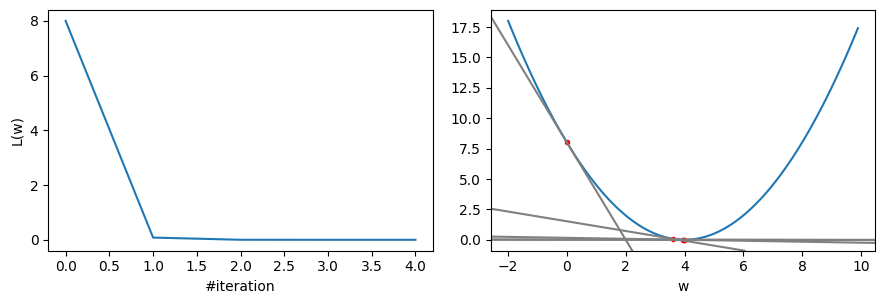

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

axes[0].plot(losses, '-')
axes[0].set_xlabel('#iteration')
axes[0].set_xlabel('#iteration')
axes[0].set_ylabel('L(w)')

w = np.arange(-2, 10, 0.1)
L = 0.5 * (w - 4)**2
axes[1].plot(w, L)
axes[1].plot(ws, losses, '.r')
axes[1].set_xlabel('w')

for k in range(len(dws)):
    axes[1].axline((ws[k], losses[k]), slope=dws[k], color='gray')
    
plt.show()

## Example 2

We are given a set of points in 2 dimensions.

```python
X = np.array([
        32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
        55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
        45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
        48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([
        31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
        78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
        55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
        60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
```
We are going to establish the best relationship between `X` and `Y` as `Y_pred = w * X + b`. Find the best value for `w` and `b` such that the error between `Y_pred` and `Y` is minimum.

### Loss and loss gradient

Let $X=(x_i)$,  $Y = (y_i)$, and $Y_{\text{pred}} = (w x_i + b)$. Next, let us define a loss (cost) function as the mean squared errors between $Y$ and $Y_{\text{pred}}$.

The loss function:
$$J =\frac{1}{n} \sum_{i=1}^n\left(y_i-\underbrace{\left(w x_i+b\right)}_{Y_{\text{pred}}}\right)^2  =\frac{1}{n} \sum_{i=1}^n\left(y_i-w x_i-b\right)^2 $$

where:

* $J$ is the total lost
* $y_i$ is the measurement at $x_i$
* $w$ and $b$ are the weight and the bias which are associated to $x_i$ and used to estimate $y_i$

The gradient is computed as folows:

$$ \left[\frac{\partial J}{\partial w}, \frac{\partial J}{\partial b}\right] = \left[ \underbrace{\frac{-2}{n} \sum_{i=1}^n x_i \left(y_i-w x_i-b \right)}_{\partial J / \partial w}, \underbrace{\frac{-2}{n} \sum_{i=1}^n \left(y_i-w x_i-b\right)}_{\partial J / \partial b}\right] $$

The gradient is a vector of two elements.

In [12]:
def loss_fn(x, y, w, b):
    # Calculating the loss or cost
    # Returns the loss and the loss gradient

    n = float(len(x))
    
    loss = np.sum((y - w * x - b)**2) / n
    loss_grad = np.array([-2 / n * np.sum(x * (y - w * x - b)), -2 / n * np.sum(y - w * x - b)])

    return loss, loss_grad

### The gradient descent method

In [13]:
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):   
    # Initializing weight, bias, learning rate and iterations
    w = 0.1
    b = 0.01
      
    losses = []
    prev_loss = None
      
    # Estimation of optimal parameters 
    for i in range(iterations):
        # Calculationg the current loss
        loss, dloss = loss_fn(x, y, w, b)
  
        # If the change in loss is less than or equal to 
        # stopping_threshold we stop the gradient descent
        if prev_loss and abs(prev_loss-loss) <= stopping_threshold:
            break
          
        prev_loss = loss
  
        losses.append(loss)
          
        # Updating weights and bias
        w = w - (learning_rate * dloss[0])
        b = b - (learning_rate * dloss[1])
      
        print(f"Iteration {i+1}: Loss {loss:.5f}, Weight {w:.5f}, Bias {b:.5f}")
      
      
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(losses, '.-')
    plt.show()
      
    return w, b

### Main program

Iteration 1: Loss 4352.08893, Weight 0.75933, Bias 0.02289
Iteration 2: Loss 1114.85615, Weight 1.08160, Bias 0.02918
Iteration 3: Loss 341.42912, Weight 1.23913, Bias 0.03225
Iteration 4: Loss 156.64495, Weight 1.31612, Bias 0.03375
Iteration 5: Loss 112.49704, Weight 1.35376, Bias 0.03448
Iteration 6: Loss 101.94939, Weight 1.37215, Bias 0.03483
Iteration 7: Loss 99.42939, Weight 1.38115, Bias 0.03500
Iteration 8: Loss 98.82732, Weight 1.38554, Bias 0.03508
Iteration 9: Loss 98.68348, Weight 1.38769, Bias 0.03511
Iteration 10: Loss 98.64911, Weight 1.38874, Bias 0.03513
Iteration 11: Loss 98.64090, Weight 1.38925, Bias 0.03513
Iteration 12: Loss 98.63893, Weight 1.38950, Bias 0.03513
Iteration 13: Loss 98.63847, Weight 1.38963, Bias 0.03512
Iteration 14: Loss 98.63835, Weight 1.38969, Bias 0.03512
Iteration 15: Loss 98.63833, Weight 1.38972, Bias 0.03511
Iteration 16: Loss 98.63832, Weight 1.38973, Bias 0.03510
Iteration 17: Loss 98.63832, Weight 1.38974, Bias 0.03509


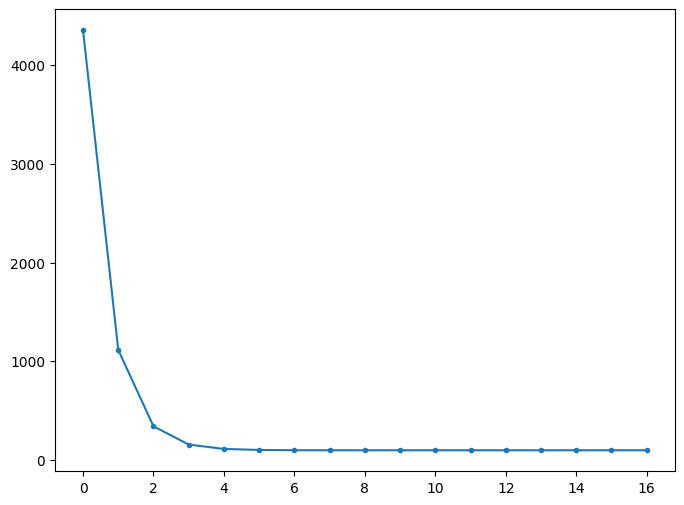

Estimated W: 1.38974
Estimated b: 0.03509


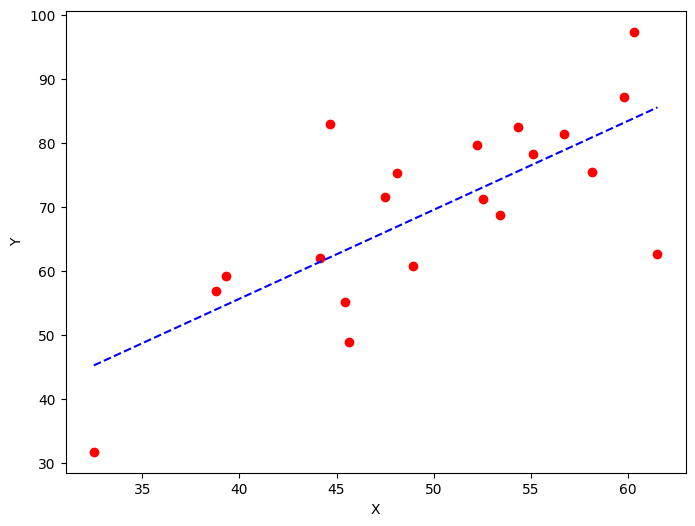

In [14]:
# Data
X = np.array([
        32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
        55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
        45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
        48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([
        31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
        78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
        55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
        60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

sorted_idx = np.argsort(X)
X = X[sorted_idx]
Y = Y[sorted_idx]

# Estimating weight and bias using gradient descent
w, b = gradient_descent(X, Y, iterations=2000)
print(f"Estimated W: {w:.5f}\nEstimated b: {b:.5f}")

# Making predictions using estimated parameters
Y_pred = w * X + b

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot(X, Y_pred, '--b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Programming Homework

Given the following function:

$f(x,y) \rightarrow \cos \left( \frac{1}{2}x \right) x \cos \left( \frac{1}{2}y\right)  $

By using gradient descent method, find its minimum point ($x$, $y$, and $z$).   

### Plot the loss function

To have a better understanding to our problem, let us plot $f(x,y)$ for $-4 \leq x \leq 4$ and $-4 \leq y \leq 4$.

In [15]:
# Put your code here

### Loss and loss gradient

In [16]:
def loss_fn(x, y):
    # Put your code here
    z = np.cos(x/2) * x * np.cos(y/2)
    
    loss = 0
    loss_grad = np.array([0., 0.])
    
    return loss, loss_grad


### The gradient descent method

In [17]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):
    # Initializing xmin, ymin, learning rate and iterations
    xmin = 0.
    ymin = 0.
      
    losses = []
    weights = []
    prev_loss = None

    # Put your code here
    
    return xmin, ymin


### Main program

In [18]:
# Put your main program here